In [65]:
from speechbrain.inference.speaker import SpeakerRecognition
import pandas as pd
import torch
import matplotlib.pyplot as plt
from transformers import Wav2Vec2FeatureExtractor, WavLMForXVector
import librosa
import re



In [40]:
def compute_cosine_similarity(audio_path1, audio_path2, feature_extractor, model):
    """
    Compute the cosine similarity between two audio files.

    Parameters:
    audio_path1 (str): Path to the first audio file.
    audio_path2 (str): Path to the second audio file.
    feature_extractor (callable): Feature extractor function.
    model (torch.nn.Module): Model to generate embeddings.

    Returns:
    float: Cosine similarity between the two audio embeddings.
    """

    # Load and preprocess the first audio file
    audio1, sr1 = librosa.load(audio_path1, sr=16000)
    inputs1 = feature_extractor(audio1, sampling_rate=sr1, return_tensors="pt")

    # Load and preprocess the second audio file
    audio2, sr2 = librosa.load(audio_path2, sr=16000)
    inputs2 = feature_extractor(audio2, sampling_rate=sr2, return_tensors="pt")

    # Generate embeddings for both audio files
    embeddings1 = model(**inputs1).embeddings
    embeddings2 = model(**inputs2).embeddings

    # Normalize the embeddings
    embeddings1 = torch.nn.functional.normalize(embeddings1, dim=-1).cpu()
    embeddings2 = torch.nn.functional.normalize(embeddings2, dim=-1).cpu()

    # Calculate cosine similarity
    cosine_sim = torch.nn.CosineSimilarity(dim=-1)
    similarity = cosine_sim(embeddings1, embeddings2).item()

    return similarity

In [ ]:
emb = speaker_model.get_embedding("an255-fash-b.wav")



In [41]:
real_data = pd.read_csv("/Users/saji/Desktop/juliusbaer-main/notebooks/real_recordings_with_name.csv")
full_data = pd.read_csv("/Users/saji/Desktop/juliusbaer-main/notebooks/prompts_df_final_name.csv")


In [42]:
df_merged = pd.merge(full_data, real_data, left_on='client', right_on='Names', how='left')


In [43]:
df_merged

,file_name,client,rec_id,Names
0,72K6TSQ829,Finn Murphy,ZGZHPG1TS8,Finn Murphy
1,O7O51MZU4N,Fatima Zahra Mansouri,YDDKTODLGX,Fatima Zahra Mansouri
2,1PSFC9GSK4,Santiago Rivera,H01FH3KEY8,Santiago Rivera
3,1JGXELMHOF,Olivia Tremblay,CBDX295MEZ,Olivia Tremblay
4,VXC2DB72R7,Isabella Rossi,2IM42LTT5R,Isabella Rossi
...,...,...,...,...
395,FPMY3OD663,Amina Kouri,PASOTPBNLM,Amina Kouri
396,TKWJHEYRLP,Lara van den Berg,1Z2W0U9OU8,Lara van den Berg
397,XATHQAOSPE,Fatima Zahra Mansouri,YDDKTODLGX,Fatima Zahra Mansouri
398,FGQ1PL8LA6,Kai Løkke,244F8XZK0E,Kai Løkke


In [44]:
PATH  = "/Users/saji/Desktop/juliusbaer-main/notebooks/audio_data/all/"


In [7]:
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")


In [8]:
results = []

for index, row in df_merged.iterrows():
    audio_to_check = PATH + row['file_name'] + ".wav"
    refer_audio = PATH + row['rec_id'] + ".wav"

    # Call the verification function
    score, prediction = verification.verify_files(audio_to_check, refer_audio)

    score = float(score.item()) if isinstance(score, torch.Tensor) else float(score)
    prediction = int(prediction.item()) if isinstance(prediction, torch.Tensor) else int(prediction)


    # Append the results to the list as a dictionary
    results.append({
        'file_name': row['file_name'],
        'ref_name':row['rec_id'],
        'score': score,
        'prediction': prediction
    })

# Convert the list of dictionaries to a DataFrame
df_impersonater = pd.DataFrame(results)


In [23]:
df_impersonater.to_csv('/Users/saji/Desktop/juliusbaer-main/notebooks/df_impersonater.csv', index=False)


,file_name,ref_name,score,prediction
0,72K6TSQ829,ZGZHPG1TS8,0.615426,1
1,O7O51MZU4N,YDDKTODLGX,0.645373,1
2,1PSFC9GSK4,H01FH3KEY8,-0.034738,0
3,1JGXELMHOF,CBDX295MEZ,0.551791,1
4,VXC2DB72R7,2IM42LTT5R,0.636094,1
...,...,...,...,...
395,FPMY3OD663,PASOTPBNLM,0.703195,1
396,TKWJHEYRLP,1Z2W0U9OU8,0.083033,0
397,XATHQAOSPE,YDDKTODLGX,0.682689,1
398,FGQ1PL8LA6,244F8XZK0E,0.098414,0


In [20]:
df_impersonater[(df_impersonater['score'] > 0.70) & (df_impersonater['score'] <= 0.72)]


,file_name,ref_name,score,prediction
6,UMM0YIUKNH,ROHDD0Z6CG,0.710706,1
55,YEZKNC4RNY,2IM42LTT5R,0.717175,1
76,4REKDG0V64,H01FH3KEY8,0.716688,1
83,GWE85UXMG3,PASOTPBNLM,0.702224,1
109,572K7GROWM,ROHDD0Z6CG,0.715802,1
119,5KLHR74OI0,IIBWPCAJFZ,0.715324,1
126,32LZR8ZQYK,ZCB53KC2PC,0.700403,1
128,MIRV2AHSDH,H01FH3KEY8,0.709813,1
133,541T0I3AUW,ZCB53KC2PC,0.705762,1
152,GAJOY10X4A,3162VQ31V7,0.707636,1


In [17]:

df_impersonater[df_impersonater['ref_name'] == "244F8XZK0E"]


,file_name,ref_name,score,prediction
20,NPVTQJD50W,244F8XZK0E,0.080600,0
24,FPLK2Z9M1O,244F8XZK0E,0.926722,1
30,77C2EX0563,244F8XZK0E,0.762622,1
38,0D2XANLNWB,244F8XZK0E,0.118278,0
107,X8L6WJ0NDN,244F8XZK0E,0.780582,1
127,AXZKAINTK1,244F8XZK0E,0.798525,1
143,244F8XZK0E,244F8XZK0E,1.000000,1
157,51RBYSZVEY,244F8XZK0E,0.934823,1
217,LF0QTFG29B,244F8XZK0E,0.672316,1
242,22LW1V963Y,244F8XZK0E,0.939575,1


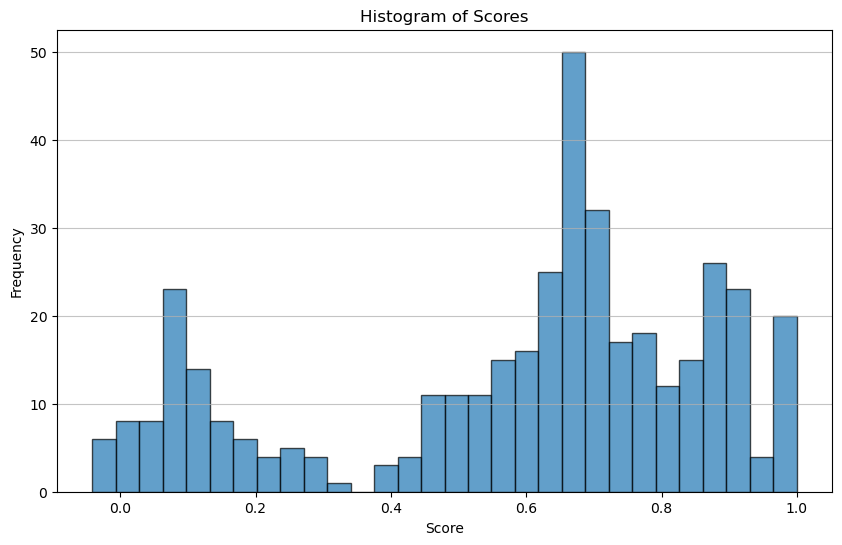

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df_impersonater['score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the histogram
plt.show()


In [22]:
count_greater_than = (df_impersonater['score'] > 0.5).sum()

# Print the result
print(f'Number of scores greater than 0.8: {count_greater_than}')


Number of scores greater than 0.8: 287


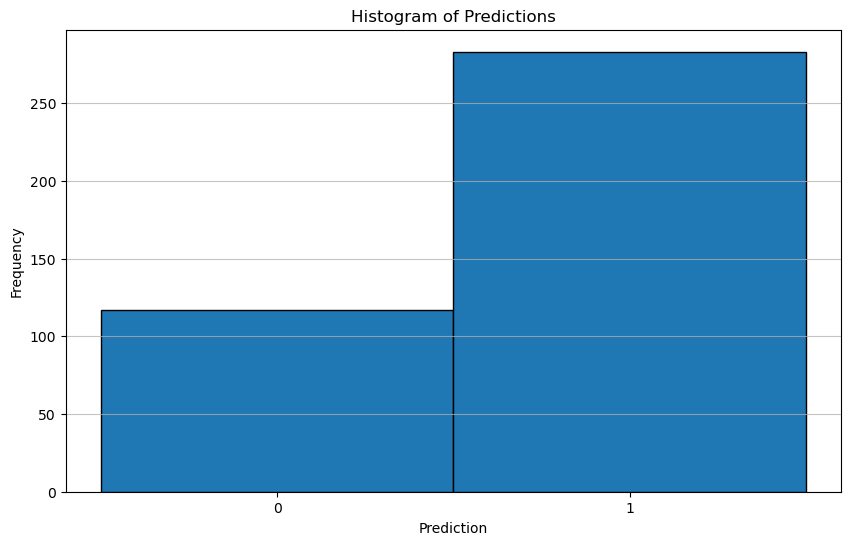

tensor([0.8713])

In [45]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained('microsoft/wavlm-base-sv')
model = WavLMForXVector.from_pretrained('microsoft/wavlm-base-sv')


Some weights of the model checkpoint at microsoft/wavlm-base-sv were not used when initializing WavLMForXVector: ['wavlm.encoder.pos_conv_embed.conv.weight_g', 'wavlm.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMForXVector from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMForXVector from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMForXVector were not initialized from the model checkpoint at microsoft/wavlm-base-sv and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream

In [46]:
audio_path1 = PATH + "244F8XZK0E"+ ".wav"
audio_path2 = PATH +   "3CLTHAJWT5" + ".wav"

compute_cosine_similarity(audio_path1, audio_path2, feature_extractor, model)



/Users/saji/miniconda3/envs/bert/lib/python3.10/site-packages/torch/nn/functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


0.9462426900863647

In [47]:
results = []

for index, row in df_merged.iterrows():
    audio_to_check = PATH + row['file_name'] + ".wav"
    refer_audio = PATH + row['rec_id'] + ".wav"

    # Call the verification function
    #score, prediction = verification.verify_files(audio_to_check, refer_audio)
    score = compute_cosine_similarity(audio_to_check, refer_audio, feature_extractor, model)
    #score = float(score.item()) if isinstance(score, torch.Tensor) else float(score)
    #prediction = int(prediction.item()) if isinstance(prediction, torch.Tensor) else int(prediction)


    # Append the results to the list as a dictionary
    results.append({
        'file_name': row['file_name'],
        'ref_name':row['rec_id'],
        'score': score
    })

# Convert the list of dictionaries to a DataFrame
df_impersonater_micro = pd.DataFrame(results)


In [57]:
count_greater_than = (df_impersonater_micro['score'] > 0.94).sum()

# Print the result
print(f'Number of scores greater than 0.8: {count_greater_than}')


Number of scores greater than 0.8: 271


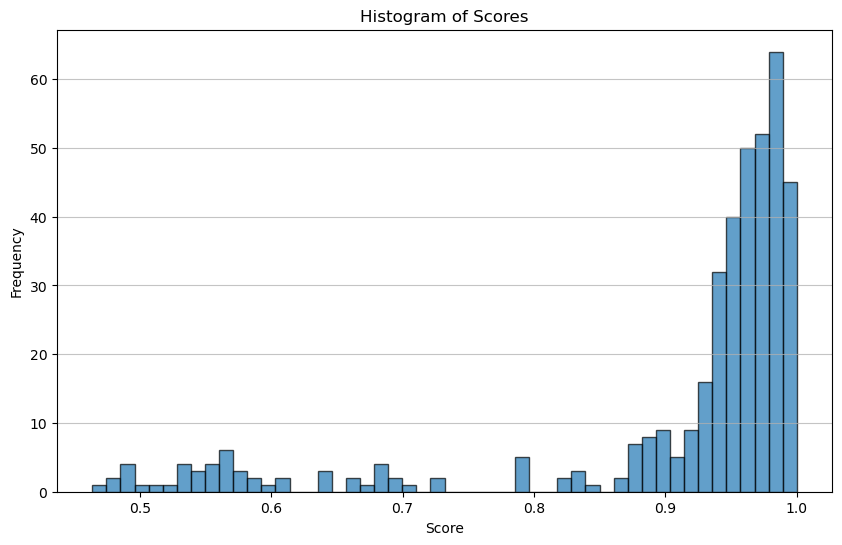

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df_impersonater_micro['score'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the histogram
plt.show()


In [48]:
df_impersonater_micro

,file_name,ref_name,score
0,72K6TSQ829,ZGZHPG1TS8,0.960846
1,O7O51MZU4N,YDDKTODLGX,0.944329
2,1PSFC9GSK4,H01FH3KEY8,0.695092
3,1JGXELMHOF,CBDX295MEZ,0.936393
4,VXC2DB72R7,2IM42LTT5R,0.972640
...,...,...,...
395,FPMY3OD663,PASOTPBNLM,0.895460
396,TKWJHEYRLP,1Z2W0U9OU8,0.787662
397,XATHQAOSPE,YDDKTODLGX,0.950106
398,FGQ1PL8LA6,244F8XZK0E,0.819517


In [49]:
df_impersonater_micro.to_csv('/Users/saji/Desktop/juliusbaer-main/notebooks/df_impersonater_micro.csv', index=False)


In [59]:
import nemo.collections.asr as nemo_asr
speaker_model = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(model_name='titanet_large')


[NeMo I 2024-06-30 09:24:31 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/titanet_large/versions/v1/files/titanet-l.nemo to /Users/saji/.cache/torch/NeMo/NeMo_1.21.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo
[NeMo I 2024-06-30 09:24:43 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2024-06-30 09:24:44 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-06-30 09:24:44 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-06-30 09:24:44 features:289] PADDING: 16
[NeMo I 2024-06-30 09:24:44 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /Users/saji/.cache/torch/NeMo/NeMo_1.21.0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.


In [68]:
results = []

for index, row in df_merged.iterrows():
    audio_to_check = PATH + row['file_name'] + ".wav"
    refer_audio = PATH + row['rec_id'] + ".wav"

    # Call the verification function
    #score, prediction = verification.verify_files(audio_to_check, refer_audio)
    #score = compute_cosine_similarity(audio_to_check, refer_audio, feature_extractor, model)
    decision = speaker_model.verify_speakers(audio_to_check,refer_audio)
    #score = float(score.item()) if isinstance(score, torch.Tensor) else float(score)
    #prediction = int(prediction.item()) if isinstance(prediction, torch.Tensor) else int(prediction)


    # Append the results to the list as a dictionary
    results.append({
        'file_name': row['file_name'],
        'ref_name':row['rec_id'],
        'prediction': decision
    })

# Convert the list of dictionaries to a DataFrame
df_impersonater_nvidia = pd.DataFrame(results)

[NeMo I 2024-06-30 09:31:38 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:38 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:39 label_models:532]  two audio files are from different speakers
[NeMo I 2024-06-30 09:31:39 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:40 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:40 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:41 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:42 label_models:532]  two audio files are from different speakers
[NeMo I 2024-06-30 09:31:42 label_models:532]  two audio files are from different speakers
[NeMo I 2024-06-30 09:31:43 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:43 label_models:529]  two audio files are from same speaker
[NeMo I 2024-06-30 09:31:44 label_models:532]  

,file_name,ref_name,prediction
0,72K6TSQ829,ZGZHPG1TS8,True
1,O7O51MZU4N,YDDKTODLGX,True
2,1PSFC9GSK4,H01FH3KEY8,False
3,1JGXELMHOF,CBDX295MEZ,True
4,VXC2DB72R7,2IM42LTT5R,True
...,...,...,...
395,FPMY3OD663,PASOTPBNLM,True
396,TKWJHEYRLP,1Z2W0U9OU8,False
397,XATHQAOSPE,YDDKTODLGX,True
398,FGQ1PL8LA6,244F8XZK0E,False


In [64]:
audio_path1 = PATH + "244F8XZK0E"+ ".wav"
audio_path2 = PATH +   "0D2XANLNWB" + ".wav"

decision = speaker_model.verify_speakers(audio_path1,audio_path2)
print(decision)

[NeMo I 2024-06-30 09:27:33 label_models:532]  two audio files are from different speakers
False


In [67]:
print(decision)

False


In [66]:
match = re.search(r'(True|False)$', decision.strip())


AttributeError: 'bool' object has no attribute 'strip'

In [29]:
# Load and preprocess the first audio file
audio_path1 = PATH + "244F8XZK0E"+ ".wav"
audio1, sr1 = librosa.load(audio_path1, sr=16000)
inputs1 = feature_extractor(audio1, sampling_rate=sr1, return_tensors="pt")

# Load and preprocess the second audio file
audio_path2 = PATH +   "244F8XZK0E" + ".wav"
audio2, sr2 = librosa.load(audio_path2, sr=16000)
inputs2 = feature_extractor(audio2, sampling_rate=sr2, return_tensors="pt")

# Generate embeddings for both audio files
embeddings1 = model(**inputs1).embeddings
embeddings2 = model(**inputs2).embeddings

# Normalize the embeddings
embeddings1 = torch.nn.functional.normalize(embeddings1, dim=-1).cpu()
embeddings2 = torch.nn.functional.normalize(embeddings2, dim=-1).cpu()

# Calculate cosine similarity
cosine_sim = torch.nn.CosineSimilarity(dim=-1)
similarity = cosine_sim(embeddings1, embeddings2)

print(similarity)

tensor([0.9510], grad_fn=<SumBackward1>)